<a href="https://colab.research.google.com/github/ricglz/CE888_activities/blob/main/Lab_6/Lab_6_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
values = df.values[:,1:]
values[:5]

array([[90.2, 10.0, 7.58, 44.9, 1610, 9.44, 56.2, 5.82, 553],
       [16.6, 28.0, 6.55, 48.6, 9930, 4.49, 76.3, 1.65, 4090],
       [27.3, 38.4, 4.17, 31.4, 12900, 16.1, 76.5, 2.89, 4460],
       [119.0, 62.3, 2.85, 42.9, 5900, 22.4, 60.1, 6.16, 3530],
       [10.3, 45.5, 6.03, 58.9, 19100, 1.44, 76.8, 2.13, 12200]],
      dtype=object)

In [4]:
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

In [5]:
from sklearn.metrics import silhouette_score

def evaluate_clustering(cluster, values, fixed_params, param_grid):
    best_score = float('-inf')
    best_params, best_cluster = None, None
    for params in make_generator(param_grid):
        params.update(fixed_params)
        ca = cluster(**params)
        ca.fit(values)
        labels = ca.labels_
        score = silhouette_score(values, labels)

        if score > best_score:
            best_score = score
            best_params = params
            best_cluster = ca
    return best_score, best_params, best_cluster

# K-Means

In [6]:
km_fixed_params = {'n_clusters': 3}
km_param_grid = {'n_init': [5, 10, 20], 'max_iter': [150, 300, 600]}

In [9]:
from sklearn.cluster import KMeans

results = evaluate_clustering(KMeans, values, km_fixed_params, km_param_grid)
best_km_score, best_km_params, best_km_cluster = results

In [10]:
best_km_score, best_km_params

(0.7106457354531156, {'max_iter': 300, 'n_clusters': 3, 'n_init': 5})

# Birch

In [14]:
birch_fixed_params = {'n_clusters': 3}
birch_param_grid = {'branching_factor': [6, 12, 25], 'threshold': [0.6, 0.12, 0.25]}

In [15]:
from sklearn.cluster import Birch

results = evaluate_clustering(Birch, values, birch_fixed_params, birch_param_grid)
best_birch_score, best_birch_params, best_birch_cluster = results

In [16]:
best_birch_score, best_birch_params

(0.5963166959187518,
 {'branching_factor': 6, 'n_clusters': 3, 'threshold': 0.6})

# Predict

---

The clustering model that will be used will be KMeans as it had a better silhouette score 

In [18]:
predicted_labels = best_km_cluster.predict(values)

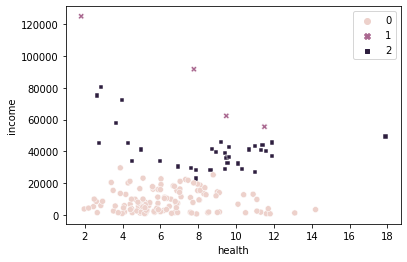

In [19]:
import seaborn as sns

sns.scatterplot(
    data=df, x='health', y='income',
    hue=predicted_labels, style=predicted_labels)

In [20]:
df['Predicted Type'] = predicted_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted Type
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
